# Who will win the elections? (60pt)

In [1]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

    This question asks you to do a simple election model. We are looking for the U.S. 2020 presidentialelections by counties. Your task is to model the winner (1/0 for democratic/republican candidate winning the presidential elections in this county), and explain the winner using population density, education level, income, and geographic differences (the census region).

    1. (2pt) Load data, and do basic sanity checks.    

In [2]:
# Load the election dataframe
election_df = pd.read_csv('/home/jovyan/PS/data/us-elections_2000-2020.csv', sep='\t')
# Create a copy of the original dataframe for later purpose
before_fill = election_df.copy()
# Perform sanity checks
print("Number of rows: ", election_df.shape[0])
print("Number of columns: ", election_df.shape[1])
print("NA values in this dataframe:")
print(election_df.isna().sum())
election_df.head(5)

Number of rows:  37390
Number of columns:  22
NA values in this dataframe:
FIPS                 0
year                 0
state                0
state2               0
county               0
office               0
candidate            0
party                0
candidatevotes       4
totalvotes           0
income            6762
population        6762
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
region               0
dtype: int64


,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
3,1001,2004,Alabama,AL,Autauga,President,George W. Bush,republican,15196.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
4,1001,2008,Alabama,AL,Autauga,President,Barack Obama,democrat,6093.0,23641,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south


    2. (7pt) You are going to work with 2020 data. However, some important information for 2020 is missing. Fill the missings with the most recent values that exist in the data.
    Hint: check out DataFrame.fillna method.

In [3]:
# Fill the missings with the most recent values that exsist in the data
election_df = election_df.groupby("FIPS").fillna(method = 'ffill')
election_df.isna().sum()

year                0
state               0
state2              0
county              0
office              0
candidate           0
party               0
candidatevotes      2
totalvotes          0
income            644
population        644
LND010200D          0
EDU695209D          0
EDU600209D          0
POP010210D          0
POP220210D          0
POP250210D          0
POP320210D          0
POP400210D          0
PST110209D          0
region              0
dtype: int64

    3. (3pt) Ensure you order your observations right and do not fill missings with values from other counties. Print out a few lines before and after filling missings, where you show that you have done this correctly: a) missings are filled with the previous value; and b) it is the previous value for this county, not another county.
    Note: printing out challenging cases like here is a good approach to data processing in many contexts, not just in this PS.

In [4]:
# Use Autauga as an example of comparison of before and after fillna
# Before filling the missing values
print('Before filling the missing values for Autauga (FIPS: 1001):')
before_fill[before_fill.FIPS == 1001][['FIPS', 'county', 'income', 'population', 'year']]

Before filling the missing values for Autauga (FIPS: 1001):


,FIPS,county,income,population,year
0,1001,Autauga,23680.0,44021.0,2000
1,1001,Autauga,23680.0,44021.0,2000
2,1001,Autauga,27542.0,48366.0,2004
3,1001,Autauga,27542.0,48366.0,2004
4,1001,Autauga,32863.0,53277.0,2008
5,1001,Autauga,32863.0,53277.0,2008
6,1001,Autauga,35067.0,54954.0,2012
7,1001,Autauga,35067.0,54954.0,2012
8,1001,Autauga,39883.0,55243.0,2016
9,1001,Autauga,39883.0,55243.0,2016


As shown, the last two observations have missing values for income and population for Autauga (FIPS: 1003)

In [5]:
# After filling the missing values
print('After filling the missing values for Autauga (FIPS: 1001):')
after_fill = election_df[['county', 'income', 'population', 'year']].iloc[0:12]
after_fill

After filling the missing values for Autauga (FIPS: 1001):


,county,income,population,year
0,Autauga,23680.0,44021.0,2000
1,Autauga,23680.0,44021.0,2000
2,Autauga,27542.0,48366.0,2004
3,Autauga,27542.0,48366.0,2004
4,Autauga,32863.0,53277.0,2008
5,Autauga,32863.0,53277.0,2008
6,Autauga,35067.0,54954.0,2012
7,Autauga,35067.0,54954.0,2012
8,Autauga,39883.0,55243.0,2016
9,Autauga,39883.0,55243.0,2016


As shown, the last two observations that were NAs before are now filled with the value from 2016.

    4. (3pt) If you did this correctly, then even after filling in NA-s there are a few cases missing. What is going on? Explain!

In [6]:
# Use Maui as an example of no existing values for certain FIPS
before_fill = before_fill[['FIPS', 'county', 'income', 'population', 'year']]
before_fill[before_fill.income.isna() == True].county
before_fill[before_fill.FIPS == 15009]

,FIPS,county,income,population,year
6268,15009,Maui,NaN,NaN,2000
6269,15009,Maui,NaN,NaN,2000
6270,15009,Maui,NaN,NaN,2004
6271,15009,Maui,NaN,NaN,2004
6272,15009,Maui,NaN,NaN,2008
6273,15009,Maui,NaN,NaN,2008
6274,15009,Maui,NaN,NaN,2012
6275,15009,Maui,NaN,NaN,2012
6276,15009,Maui,NaN,NaN,2016
6277,15009,Maui,NaN,NaN,2016


The reason why some of the NAs are still missing is because those places with FIPS codes do not have any existing or previous value for the fillna() function to fill value with. This is because for the fillna() function, I used the method "ffill" which stands for forward fill. What it does is that it propagates last valid observation forward to next valid. For example, for the county Baldwin, before filling the values, the last two observations of Baldwin have NA values. After grouping by FIPS, the function realized that there are previous observations for Baldwin and fill the NAs with those values. However, for counties like Maui (as shown above), its observations only have NA values. After grouping by the FIPS, the function realizes there are no values to grab from besides the NA value and thus fill the observations with NA values. This is the reason why there are still NA-s in the data frame.

    5. (10pt) Make a new data frame that only contains 2020 data, and that contains a binary variable: the democrats won in that county in 2020.
    Hint: You have to build that variable using two lines of data in the original data frame by FIPS after the data is ordered by year. The orignal data contains two lines for each county, one for democrats and one for republicans. They contain the party-specific number of votes but are otherwise similar. You may extract the rows for democrats, the rows for republicans, and then just compare these two rows county-wise to see who won there. Note that it is not enough to just check if democrats/republicans got more than 50% of votes.
    However, when you extract the vote numbers, it will be a series with an index. You may want to either reset the index (see examples in Combining data into data frames) or convert the series into a numpy array with the .values attribute.

In [7]:
# Drop the rows with NA values since they are no use for the analysis like described in question 4
election_df.dropna(inplace = True)
# Create a new dataframe that contains data only from 2020
election_2020_df = election_df[election_df.year == 2020]

# Create conditions for boolean to check whether democrat won or not in the df
democrat = election_2020_df[election_2020_df.party == 'democrat'].candidatevotes.values
republican = election_2020_df[election_2020_df.party == 'republican'].candidatevotes.values
democrat_win = democrat > republican

# Check whether democrates won or not 
democrat_2020_df = election_2020_df[election_2020_df.party == 'democrat']
# Create a copy of the df to avoid warning
democrat_2020_df = democrat_2020_df.copy()
# Create a new variable called democrat_won where if the democrat won, return 1, else, return 0
democrat_2020_df['democrat_won'] = np.where(democrat_win == True, 1, 0)
democrat_2020_df.head(5)

,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,income,...,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region,democrat_won
11,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,39883.0,...,2285,31469,54571,42855,9643,474,1310,7085,south,0
23,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,43143.0,...,10855,118585,182265,156153,17105,1348,7992,39463,south,0
35,2020,Alabama,AL,Barbour County,President,Joshep Biden,democrat,4816.0,10518,31932.0,...,1048,19791,27457,13180,12875,107,1387,699,south,0
47,2020,Alabama,AL,Bibb County,President,Joshep Biden,democrat,1986.0,9595,28976.0,...,464,14489,22915,17381,5047,22,406,1698,south,0
59,2020,Alabama,AL,Blount County,President,Joshep Biden,democrat,2640.0,27588,32902.0,...,1561,38472,57322,53068,761,117,4626,7323,south,0


    6. (10pt) Create auxiliary variables: population density (population divided by land area); and percentage of college graduates. These can be made of different variables, and as none of these are changing fast, it should not have much of an impact.

In [8]:
# Create new variable population density
democrat_2020_df['population_density'] = democrat_2020_df.population / democrat_2020_df.LND010200D / 1000
# Create new variable percentage of college graduates
# Eneded up using EDU600209D since both variables are from 2005-2009
democrat_2020_df['college_grad_percentage'] = 100 * (democrat_2020_df.EDU695209D / democrat_2020_df.EDU600209D)

    7. (2pt) Ensure that the variables you are going to use are in a reasonable range!
    Hint: there are values that do not make sense. Use min and max to check to find such values and remove those.

In [9]:
# After checking, Maximum of population density should not be inf
democrat_2020_df.drop(democrat_2020_df[democrat_2020_df['LND010200D'] == 0].index, inplace = True)
# After checking, minimum of college graduate percentage should not be 0
democrat_2020_df.drop(democrat_2020_df[democrat_2020_df['EDU695209D'] == 0].index, inplace = True)
# After checking, the minimum of college graduate percentage should not be 0
# Print the min and max of population_density and college_grad_percentage
print('Minimum of population density:', democrat_2020_df['population_density'].min())
print('Maximum of population density:', democrat_2020_df['population_density'].max())
print('Minimum of college graduate percentage:', democrat_2020_df['college_grad_percentage'].min())
print('Maximum of college graduate percentage:', democrat_2020_df['college_grad_percentage'].max())

Minimum of population density: 0.00017285957006722317
Maximum of population density: 48.42887177968611
Minimum of college graduate percentage: 0.27666769136181985
Maximum of college graduate percentage: 37.00556242274413


    8. (10pt) Estimate logistic regression model where you explain democrats’ winning with population density, education level, income, and census region.

In [10]:
# Divide income by 1000 for better analysis
democrat_2020_df['income_1000'] = democrat_2020_df.income / 1000
# Run logistice regression model
logistic_winning = smf.logit("democrat_won ~ population_density + college_grad_percentage + income_1000 + C(region)", data = democrat_2020_df).fit()
logistic_winning.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.305442
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:           democrat_won
Method:                          dydx
At:                           overall
===========================================================================================
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(region)[T.northeast]      0.1152      0.020      5.890      0.000       0.077       0.154
C(region)[T.south]          0.0546      0.015      3.708      0.000       0.026       0.083
C(region)[T.west]           0.1350      0.017      8.149      0.000       0.103       0.168
population_density          0.2191      0.022      9.806      0.000       0.175       0.263
college_grad_percentage     0.0252      0.002     13.481      0.000       0.022       0.029
income_1000                -0.0024      0.001     -3.714      0.000      -0.004      -0.001
===========================================================================================
"""

    9. (13pt) Interpret the results. Which results are statistically significant?
    Note: you may want to change some of the units, e.g. you may want to measure population density in 1000/per sq mi, instead of persons per sq mi.

In this logistic model, the reference category is midwest. This means that the predicted difference in the probability of Democrats winning is 0.1152 percentage points in the northeast, 0.0555 percentage points in the south, and 0.0546 percentage points higher on average compared to the midwest region. An increase in the population density by 1000/per square mile is associated with 0.2191 percentage points in the likelihood of the county voting majority for Democrats. An increase in the college graduation percent is associated with 0.0252 percentage points in the possibility of the county voting majority for Democrats. Lastly, an increase in the income (in thousands) is associated with a 0.0024 decrease in the likely hood of the county voting majority for Democrats. Since all of these results have p values that are less than a typical alpha value (i.e., 0.05), they are all statistically significant.

# Model AirBnB Price (40pt)

    Your next task is to analyze the Beijing AirBnB listing price (variable price) in Beijing. It is downloaded from Inside Airbnb but we suggest to use the version on canvas (airbnb-beijing-listings.csv). You have to work with several sorts of categorical variables, including those that contain way too many too small categories. You are also asked to do log-transforms and interpret the results.

    1. (2pt) Load data. Select only relevant variables you need below. Even better, check out the usecols argument for read_csv. Do basic checks.

In [11]:
# Load the airbnb data
airbnb_df = pd.read_csv('/home/jovyan/PS/data/airbnb-beijing-listings.csv', sep = ",", usecols = ["accommodates", "price", "room_type", "bedrooms", "bathrooms"])
# Sanity check
print("Number of rows: ", airbnb_df.shape[0])
print("Number of columns: ", airbnb_df.shape[1])
print("NA values in this dataframe:")
print(airbnb_df.isna().sum())
airbnb_df.head(5)

Number of rows:  38814
Number of columns:  5
NA values in this dataframe:
room_type         0
accommodates      0
bathrooms         7
bedrooms        114
price             0
dtype: int64


,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,$831.00
1,Private room,2,1.0,1.0,"$1,197.00"
2,Entire home/apt,2,1.0,1.0,$598.00
3,Entire home/apt,2,1.0,1.0,$598.00
4,Entire home/apt,2,1.0,1.0,$598.00


    2. (5pt) Do the basic data cleaning:
    (a) convert price to numeric.

In [12]:
# Covert price to numeric
airbnb_df['price'] = airbnb_df['price'].apply(lambda x: x.replace('$', ''))
airbnb_df['price'] = airbnb_df['price'].apply(lambda x: x.replace(',', ''))
airbnb_df['price'] = pd.to_numeric(airbnb_df['price'])

    (b) remove entries with missing or invalid price, bedrooms, and other variables you need below

In [13]:
# Drop the entries with missing or invalid price, bedrooms or other variables
airbnb_df.dropna(inplace = True)
# 0 cannot exsists when doing log transformations, remove prices that are 0 and also price should not be 0
airbnb_df = airbnb_df[airbnb_df.price != 0]
airbnb_df.isna().sum()

room_type       0
accommodates    0
bathrooms       0
bedrooms        0
price           0
dtype: int64

    3. (4pt) Analyze the distribution of price. Does it look like normal? Does it look like something else? Does it suggest you should do a log-transformation?
    Hint: consult lecture notes Section 4.1.8 Interactions and Feature Transformations.

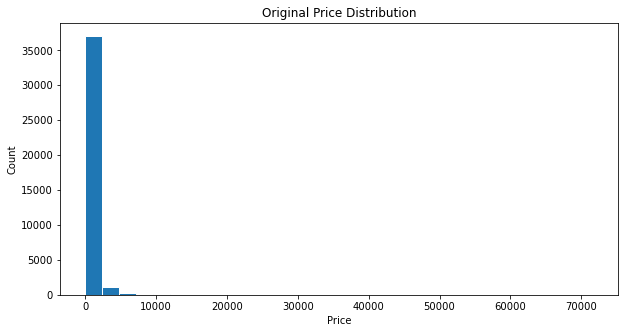

In [14]:
# Plot the original price
plt.rcParams["figure.figsize"] = (10, 5)
plt.hist(airbnb_df.price, edgecolor = 'w', bins = 30)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count') 
plt.show()

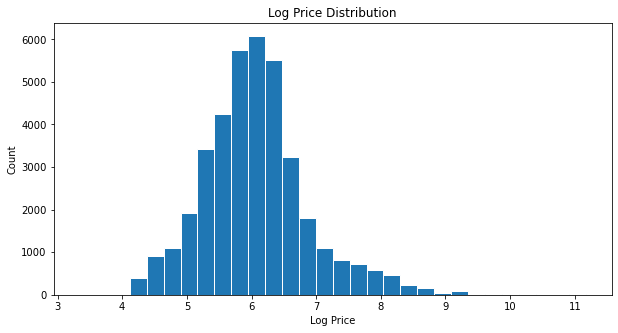

In [15]:
# Create log price
log_price = np.log(airbnb_df.price)
plt.hist(log_price, edgecolor = 'w', bins = 30)
plt.title('Log Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Count') 
plt.show()

Before taking the log value of the price, the distribution of the original price looks heavily right-skewed, which is an indication that log transformation needs to be performed. After performing the log transformation, the log value of price distribution looks more normal.

    4. (6pt) Convert the number of bedrooms into another variable with a limited number of categories only, such as 0, 1, 2, 3, 4+, and use these categories in the models below.
    Hint: consult the python notes https://faculty.washington.edu/otoomet/machinelearning-py/cleaning-data.html

In [16]:
# Create another variable called bedroom_category that is based on the number of bedrooms
airbnb_df['bedroom_category'] = pd.cut(airbnb_df.bedrooms,
                                       bins = [-np.inf, 0, 1, 2, 3, np.inf],
                                       labels = ["0", "1", "2", "3", "4+"])

    5. (6pt) Run a linear regression where you explain the listing price with number of bedrooms where bedrooms uses these categories. Interpret the results, including R2.
    Hint: if 0-BR is the reference category, the effect for 1BR should be -11.62 (but it depends on how exactly did you clean data).    

In [17]:
# Run a linear regression where explain the listing price with number of bedrooms
regression_bed = smf.ols("price ~ C(bedroom_category)", data = airbnb_df).fit()
regression_bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1093.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:52:51   Log-Likelihood:            -3.4133e+05
No. Observations:               38686   AIC:                         6.827e+05
Df Residuals:                   38681   BIC:                         6.827e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   448.8851    107.166      4.189      0.000     238.837     658.933
C(bedroom_category)[T.1]    -11.6223    107.655     -0.108      0.914    -222.628     199.384
C(bedroom_category)[T.2]    295.9590    108.801      2.720      0.007      82.705     509.213
C(bedroom_category)[T.3]    746.0202    111.966      6.663      0.000     526.565     965.476
C(bedroom_category)[T.4+]  2167.8388    111.995     19.357      0.000    1948.326    2387.352
==============================================================================
Omnibus:                    95843.461   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539629661.103
Skew:                          26.864   Prob(JB):                         0.00
Kurtosis:                     978.842   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept's coefficient means that when there are no bedrooms in the Airbnb (bedroom = 0), the listing price is about 448.8851. For every increase of one bedroom, the price decreases by approximately 11.6223. For every increase of two bedrooms, the listing price goes up by about 295.9590. For every increase of three bedrooms, the listing price goes up by about 746.0202. For every increase of four or more bedrooms, the listing price goes up by about 2167.8388. All these are compared with when there are 0 bedrooms. These are all statistically significant except for when there is only one bedroom since all of them have a p-value that is less than a typical alpha value (i.e., 0.05).

$R^2$ in this model is 0.102, which is a very low value since it is much closer to 0 than 1. This means that there is not a strong correlation. This also means that this model is not a good model from a predictive perspective.

    6. (8pt) Now repeat the process with the model where you analyze log price instead of price. Interpret the results. Which model behaves better in the sense of R2?
    Hint: if you cleaned the data the same way as me, you should see R2=0.32. For the following task use either log(price) or price, depending on your answer here.

In [18]:
# Create a linear regression modal for the log price
log_regression = smf.ols("log_price ~ C(bedroom_category)", data = airbnb_df).fit()
log_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4562.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:52:51   Log-Likelihood:                -40076.
No. Observations:               38686   AIC:                         8.016e+04
Df Residuals:                   38681   BIC:                         8.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.8117      0.044    130.662      0.000       5.724       5.899
C(bedroom_category)[T.1]     -0.0323      0.045     -0.724      0.469      -0.120       0.055
C(bedroom_category)[T.2]      0.5306      0.045     11.749      0.000       0.442       0.619
C(bedroom_category)[T.3]      0.9396      0.046     20.219      0.000       0.848       1.031
C(bedroom_category)[T.4+]     1.5931      0.046     34.272      0.000       1.502       1.684
==============================================================================
Omnibus:                     3876.704   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16891.857
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                       6.128   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of the intercept means that when the bedroom is 0, then the log price is about 5.8117. For every increase of a one-bedroom Airbnb, the log price decreases about 0.0323 on average. For every increase of two bedrooms Airbnb, the log price will increase by about 0.5306. For every increase of three bedrooms Airbnb, the log price will increase by about 0.9396 on average. For every increase of four or more bedrooms Airbnb, the log price will increase by 1.5931. All of these values, except for one-bedroom Airbnb, are statistically significant since they all have p values that are less than a typical alpha value (i.e., 0.05).

The $R^2$ of this model is 0.321, which is still a low $R^2$ value since it is still closer to 0 than to 1. This means that there is a weak correlation. However, compared to the model that used the regular price instead of the log value of price, the $R^2$ of this model (0.321) is much higher than the $R^2$ of the previous model (0.102). That being said, this model has a stronger correlation than the previous one and thus behaves better in the sense of $R^2$.

    7. (9pt) Finally we just add three more variables to the model: room type, accommodates, and bathrooms. While room type only contains three values, the other two contain many different categories. Recode these as
    •accommodates: “1”, “2”, “3”, “4 and more”
    •bathrooms: “0”, “1”, “2”, “3 and more”, where the 0.5 is rounded up to the next integer, e.g. 0.5 becomes 1, and 1.5 becomes 2.
    Run this model. Interpret and comment the more interesting/important results. Do not forget to mention what are the relevant reference categories and R2.

In [19]:
# Create a new variable accommodates_category that contains the recoded accommodates
airbnb_df['accommodates_category'] = pd.cut(airbnb_df.accommodates,
                                            bins = [-np.inf, 1, 2, 3, np.inf],
                                            labels = ["1", "2", "3", "4 and more"])

# Create a new variable bathrooms_category that contains the recoded bathrooms
airbnb_df['bathrooms_category'] = pd.cut(airbnb_df.bathrooms,
                                         bins = [-np.inf, 0, 1, 2, np.inf],
                                         labels = ["0", "1", "2", "3 and more"])
# Create a new linear regression model with added variables
bed_bath_acc_regression = smf.ols("log_price ~ C(bedroom_category) + C(room_type) + C(accommodates_category) + C(bathrooms_category)", data = airbnb_df).fit()
bed_bath_acc_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2709.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:52:52   Log-Likelihood:                -35751.
No. Observations:               38686   AIC:                         7.153e+04
Df Residuals:                   38673   BIC:                         7.164e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  5.5770      0.062     90.051      0.000       5.456       5.698
C(bedroom_category)[T.1]                   0.0558      0.040      1.395      0.163      -0.023       0.134
C(bedroom_category)[T.2]                   0.1898      0.041      4.632      0.000       0.110       0.270
C(bedroom_category)[T.3]                   0.4926      0.042     11.633      0.000       0.410       0.576
C(bedroom_category)[T.4+]                  0.8730      0.044     19.909      0.000       0.787       0.959
C(room_type)[T.Private room]              -0.3243      0.007    -43.838      0.000      -0.339      -0.310
C(room_type)[T.Shared room]               -0.9453      0.017    -56.064      0.000      -0.978      -0.912
C(accommodates_category)[T.2]              0.3298      0.013     24.452      0.000       0.303       0.356
C(accommodates_category)[T.3]              0.3921      0.017     23.543      0.000       0.359       0.425
C(accommodates_category)[T.4 and more]     0.6066      0.015     39.175      0.000       0.576       0.637
C(bathrooms_category)[T.1]                 0.0049      0.047      0.106      0.916      -0.087       0.097
C(bathrooms_category)[T.2]                 0.0386      0.047      0.819      0.413      -0.054       0.131
C(bathrooms_category)[T.3 and more]        0.5938      0.049     12.017      0.000       0.497       0.691
==============================================================================
Omnibus:                     9116.538   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54083.795
Skew:                           1.003   Prob(JB):                         0.00
Kurtosis:                       8.434   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It is rather interesting to see that all coefficients are statistically significant (less than a typical alpha value, i.e., 0.05) except for 1 bedroom, 1 bathroom, and 2 bathrooms. It is also interesting to see that the coefficient for two accommodates only slightly more than the coefficient for three accommodates. I would have assumed that the listing price of Airbnb would be much higher for every increase in accommodates. For all categories except for room types, their coefficients tend to increase as the rooms/accommodates increase. For room types, as the room type "degrades," the log price tends to decrease as well.

It is found that the relevant reference categories are 0 bedroom, entire home/apt-RT, 1 accommodate, and 0 bathroom. In this model, $R^2$ is 0.457, which is higher than the $R^2$ of the model that only used bedrooms in it. However, 0.457 is still closer to 0 than it is to 1. Although we put more factors in the formula, it appears that there is still not a strong correlation. Also, 0.457 is not that much of a gain from 0.321, which is surprising to see.